# Synchronous Generator dq 7th order

In [1]:
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt

## Steady State - DPsim

In [6]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

DP_SynGenDq7odODE_SteadyState

Start simulation.
Simulation finished.


In [7]:
# read log file
work_dir = 'logs/DP_SynGenDq7odODE_SteadyState/'
log_name = 'DP_SynGenDq7odODE_SteadyState'
print(work_dir + log_name + '.csv')
ts_dpsim_ode_ststate = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
ts_dpsim_ode_ststate_emt = ts.frequency_shift_list(ts_dpsim_ode_ststate, 60)

logs/DP_SynGenDq7odODE_SteadyState/DP_SynGenDq7odODE_SteadyState.csv
column number: 6
results length: 60
real column names: []
complex column names: ['i_load_0', 'i_load_1', 'i_load_2', 'v1_0', 'v1_1', 'v1_2']


In [8]:
ts_dpsim_ode_ststate_phasors = ts.phasors(ts_dpsim_ode_ststate)
for node, phasor in ts_dpsim_ode_ststate_phasors.items():
    print(node + ': ' + str(phasor['abs'].values[0]) + '<' + str(phasor['phase'].values[0]))

i_load_0: 10206.206823999999<-90.00000006175199
i_load_1: 10206.20682342328<149.99999993979029
i_load_2: 10206.206823949558<29.99999994182299
v1_0: 19595.917101<-90.00000005847727
v1_1: 19595.917101159102<149.9999999411853
v1_2: 19595.917100979615<29.99999994095115


In [9]:
pt.plot_timeseries(1, ts_dpsim_ode_ststate_emt['v1_0_shift'])
pt.plot_timeseries(1, ts_dpsim_ode_ststate_emt['v1_1_shift'])
pt.plot_timeseries(1, ts_dpsim_ode_ststate_emt['v1_2_shift'])

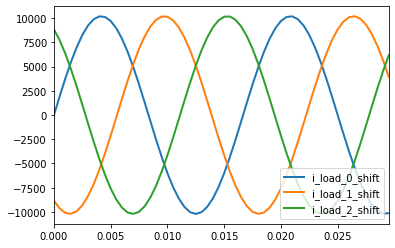

In [10]:
pt.plot_timeseries(1, ts_dpsim_ode_ststate_emt['i_load_0_shift'])
pt.plot_timeseries(1, ts_dpsim_ode_ststate_emt['i_load_1_shift'])
pt.plot_timeseries(1, ts_dpsim_ode_ststate_emt['i_load_2_shift'])

## Steady State - Simulink

In [11]:
# read Simulink log file
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://git.rwth-aachen.de/acs/public/simulation/reference-results/raw/master/Simulink/SynchronousGenerator/SynGen_dq_7th_SteadyState/SL_SynGenDq7od_SteadyState_v_i.csv'
local_file = 'reference-results/SL_SynGenDq7od_SteadyState_v_i.csv'
urllib.request.urlretrieve(url, local_file) 

ts_sl_ststate = rt.read_timeseries_simulink(local_file)

column number: 6
results length: 1733
real column names: ['v1', 'v2', 'v3', 'i1', 'i2', 'i3']
complex column names: []


In [12]:
pt.plot_timeseries(1, ts_sl_ststate['i1'])
pt.plot_timeseries(1, ts_sl_ststate['i2'])
pt.plot_timeseries(1, ts_sl_ststate['i3'])
plt.xlim(0,0.03)

(0, 0.03)

## Comparison - Steady State

(0, 0.03)

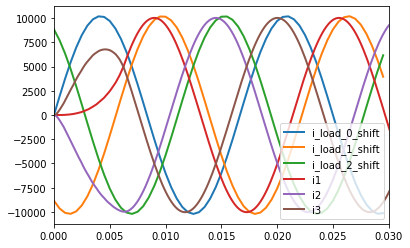

In [13]:
pt.plot_timeseries(1, ts_dpsim_ode_ststate_emt['i_load_0_shift'])
pt.plot_timeseries(1, ts_dpsim_ode_ststate_emt['i_load_1_shift'])
pt.plot_timeseries(1, ts_dpsim_ode_ststate_emt['i_load_2_shift'])
pt.plot_timeseries(1, ts_sl_ststate['i1'])
pt.plot_timeseries(1, ts_sl_ststate['i2'])
pt.plot_timeseries(1, ts_sl_ststate['i3'])
plt.xlim(0,0.03)

Time shift is required here to align plots.

## Three Phase Fault - Simulink

In [14]:
# read Simulink log file
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://git.rwth-aachen.de/acs/public/simulation/reference-results/raw/master/Simulink/SynchronousGenerator/SynGen_dq_7th_ThreePhFault/SL_SynGenDq7od_ThreePhFault_v_i.csv'
local_file = 'reference-results/SL_SynGenDq7od_ThreePhFault_v_i.csv'
urllib.request.urlretrieve(url, local_file) 

ts_sl_tpf = rt.read_timeseries_simulink(local_file)

column number: 6
results length: 6001
real column names: ['v1', 'v2', 'v3', 'i1', 'i2', 'i3']
complex column names: []


In [15]:
pt.plot_timeseries(1, ts_sl_tpf['v1'])
pt.plot_timeseries(1, ts_sl_tpf['v2'])
pt.plot_timeseries(1, ts_sl_tpf['v3'])
plt.xlim(0,0.3)

(0, 0.3)

In [16]:
pt.plot_timeseries(1, ts_sl_tpf['i1'])
pt.plot_timeseries(1, ts_sl_tpf['i2'])
pt.plot_timeseries(1, ts_sl_tpf['i3'])
plt.xlim(0,0.3)

(0, 0.3)

## Three Phase Fault - DPsim

In [17]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

DP_SynGenDq7odODE_ThreePhFault

Start simulation.
0.10005: Handle event
0.20005: Handle event
Simulation finished.


In [18]:
# read log file
work_dir = 'logs/DP_SynGenDq7odODE_ThreePhFault/'
log_name = 'DP_SynGenDq7odODE_ThreePhFault'
print(work_dir + log_name + '.csv')
ts_dpsim_ode_tpf = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
ts_dpsim_ode_tpf_emt = ts.frequency_shift_list(ts_dpsim_ode_tpf, 60)

logs/DP_SynGenDq7odODE_ThreePhFault/DP_SynGenDq7odODE_ThreePhFault.csv
column number: 10
results length: 6001
real column names: ['wr_gen']
complex column names: ['i_gen_0', 'i_gen_1', 'i_gen_2', 'i_load_0', 'i_load_1', 'i_load_2', 'v1_0', 'v1_1', 'v1_2']


In [19]:
ts_dpsim_ode_tpf_phasors = ts.phasors(ts_dpsim_ode_tpf)
for node, phasor in ts_dpsim_ode_tpf_phasors.items():
    print(node + ': ' + str(phasor['abs'].values[0]) + '<' + str(phasor['phase'].values[0]))

i_gen_0: 10206.207257<90.0
i_gen_1: 10206.207257378957<-30.00000000201289
i_gen_2: 10206.207256878957<-150.00000000284882
i_load_0: 10206.187661<-90.0
i_load_1: 10206.187661061831<149.99999999695927
i_load_2: 10206.187661427855<29.999999995372118
v1_0: 19595.88031<-90.00000000292387
v1_1: 19595.88030915192<149.99999999856834
v1_2: 19595.880309517946<29.999999997437566
wr_gen: 1.0<0.0


In [20]:
ts_dpsim_ode_tpf_emt

{'i_gen_0_shift': <villas.dataprocessing.timeseries.TimeSeries at 0x7f7dd112c710>,
 'i_gen_1_shift': <villas.dataprocessing.timeseries.TimeSeries at 0x7f7dd114f0d0>,
 'i_gen_2_shift': <villas.dataprocessing.timeseries.TimeSeries at 0x7f7dd114f550>,
 'i_load_0_shift': <villas.dataprocessing.timeseries.TimeSeries at 0x7f7dd114f190>,
 'i_load_1_shift': <villas.dataprocessing.timeseries.TimeSeries at 0x7f7dd114f590>,
 'i_load_2_shift': <villas.dataprocessing.timeseries.TimeSeries at 0x7f7dd114fd10>,
 'v1_0_shift': <villas.dataprocessing.timeseries.TimeSeries at 0x7f7dd114f890>,
 'v1_1_shift': <villas.dataprocessing.timeseries.TimeSeries at 0x7f7dd114f3d0>,
 'v1_2_shift': <villas.dataprocessing.timeseries.TimeSeries at 0x7f7dd114fe90>,
 'wr_gen_shift': <villas.dataprocessing.timeseries.TimeSeries at 0x7f7dd18fb090>}

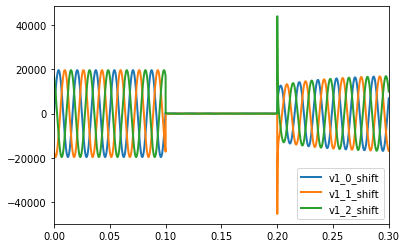

In [21]:
pt.plot_timeseries(1, ts_dpsim_ode_tpf_emt['v1_0_shift'])
pt.plot_timeseries(1, ts_dpsim_ode_tpf_emt['v1_1_shift'])
pt.plot_timeseries(1, ts_dpsim_ode_tpf_emt['v1_2_shift'])

In [22]:
pt.plot_timeseries(1, ts_dpsim_ode_tpf_emt['i_gen_0_shift'])
pt.plot_timeseries(1, ts_dpsim_ode_tpf_emt['i_gen_1_shift'])
pt.plot_timeseries(1, ts_dpsim_ode_tpf_emt['i_gen_2_shift'])

### ODE and Simulink

In [23]:
#%matplotlib qt
ts_sl_tpf_i1 = ts('i1', ts_sl_tpf['i1'].time, -ts_sl_tpf['i1'].values)
ts_sl_tpf_i2 = ts('i2', ts_sl_tpf['i2'].time, -ts_sl_tpf['i2'].values)
ts_sl_tpf_i3 = ts('i3', ts_sl_tpf['i3'].time, -ts_sl_tpf['i3'].values)

#plt.figure(figsize=(20,10))
ts_sl_tpf_i1.label = 'ia_sl'
ts_sl_tpf_i2.label = 'ib_sl'
ts_sl_tpf_i3.label = 'ic_sl'
ts_dpsim_ode_tpf_emt['i_gen_0_shift'].label = 'ia_dpsim'
ts_dpsim_ode_tpf_emt['i_gen_1_shift'].label = 'ib_dpsim'
ts_dpsim_ode_tpf_emt['i_gen_2_shift'].label = 'ic_dpsim'
pt.plot_timeseries(1, ts_sl_tpf_i1, plt_color = '#939393ff')
pt.plot_timeseries(1, ts_sl_tpf_i2, plt_color = '#939393ff')
pt.plot_timeseries(1, ts_sl_tpf_i3, plt_color = '#939393ff')
pt.plot_timeseries(1, ts_dpsim_ode_tpf_emt['i_gen_0_shift'], plt_linestyle='-.', plt_color = '#d62728ff')
pt.plot_timeseries(1, ts_dpsim_ode_tpf_emt['i_gen_1_shift'], plt_linestyle='-.', plt_color = '#0055ffff')
pt.plot_timeseries(1, ts_dpsim_ode_tpf_emt['i_gen_2_shift'], plt_linestyle='-.', plt_color = '#00aa7fff')
plt.xlabel('time (s)')
plt.ylabel('voltage (V)')
plt.xlim(0.05,0.25)
#plt.ylim(-1.6e5,1.6e5)
#plt.savefig('syngen_fault_ode.pdf')

(0.05, 0.25)

(0.09, 0.21)

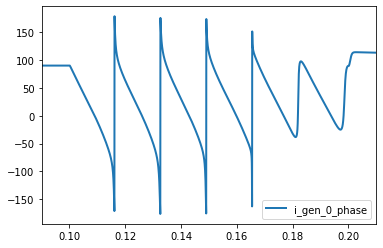

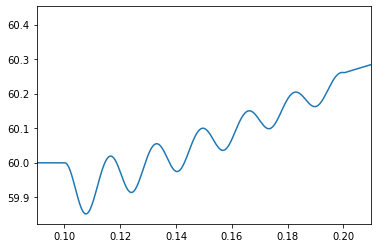

In [24]:
pt.plot_timeseries(1, ts_dpsim_ode_tpf_phasors['i_gen_0']['phase'])
plt.xlim([0.09,0.21])

plt.figure()
plt.plot(ts_dpsim_ode_tpf['wr_gen'].time, ts_dpsim_ode_tpf['wr_gen'].values * 60)
plt.xlim([0.09,0.21])

In [25]:
import numpy as np
diff = ts_sl_tpf_i1.values - ts_dpsim_ode_tpf_emt['i_gen_0_shift'].values
assert np.max(diff[:4000]) < 200

## Three Phase Fault - DPsim Trapez

In [30]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

DP_SynGenDq7odTrapez_ThreePhFault

Start simulation.
0.10005: Handle event
0.20005: Handle event
Simulation finished.


In [31]:
# read log file
work_dir = 'logs/DP_SynGenDq7odTrapez_ThreePhFault/'
log_name = 'DP_SynGenDq7odTrapez_ThreePhFault'
print(work_dir + log_name + '.csv')
ts_dpsim_trapez_tpf = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
ts_dpsim_trapez_tpf_emt = ts.frequency_shift_list(ts_dpsim_trapez_tpf, 60)

logs/DP_SynGenDq7odTrapez_ThreePhFault/DP_SynGenDq7odTrapez_ThreePhFault.csv
column number: 9
results length: 6001
real column names: []
complex column names: ['i_gen_0', 'i_gen_1', 'i_gen_2', 'i_load_0', 'i_load_1', 'i_load_2', 'v1_0', 'v1_1', 'v1_2']


In [32]:
pt.plot_timeseries(1, ts_dpsim_trapez_tpf_emt['i_gen_0_shift'])
pt.plot_timeseries(1, ts_dpsim_trapez_tpf_emt['i_gen_1_shift'])
pt.plot_timeseries(1, ts_dpsim_trapez_tpf_emt['i_gen_2_shift'])

### Trapez and Simulink

In [33]:
ts_sl_tpf_i1 = ts('i1', ts_sl_tpf['i1'].time, -ts_sl_tpf['i1'].values)
ts_sl_tpf_i2 = ts('i2', ts_sl_tpf['i2'].time, -ts_sl_tpf['i2'].values)
ts_sl_tpf_i3 = ts('i3', ts_sl_tpf['i3'].time, -ts_sl_tpf['i3'].values)

#plt.figure(figsize=(20,10))
pt.plot_timeseries(1, ts_sl_tpf_i1)
pt.plot_timeseries(1, ts_sl_tpf_i2)
pt.plot_timeseries(1, ts_sl_tpf_i3)
pt.plot_timeseries(1, ts_dpsim_trapez_tpf_emt['i_gen_0_shift'])
pt.plot_timeseries(1, ts_dpsim_trapez_tpf_emt['i_gen_1_shift'])
pt.plot_timeseries(1, ts_dpsim_trapez_tpf_emt['i_gen_2_shift'])

In [34]:
import numpy as np
diff = ts_sl_tpf_i1.values - ts_dpsim_trapez_tpf_emt['i_gen_0_shift'].values
assert np.max(diff[:4000]) < 200